# Trust Region Methods in Optimization
Trust region methods are a family of iterative optimization algorithms that are widely used for unconstrained optimization problems. The idea is to approximate the objective function locally by a simpler model, usually a quadratic model, and then solve this model within a "trust region." This region is chosen such that the model is a good approximation of the original objective function.

The general idea is:

At each iteration, we define a "trust region," a small region where we trust the approximation to be accurate.
We solve the simplified quadratic model within this region.
If the model prediction is accurate, we expand the trust region; otherwise, we reduce it.
Trust Region U

# Trust Region Update
At each iteration, the trust region is updated based on the ratio of actual improvement to predicted improvement. The update rule is as follows:

If the model's predicted improvement is close to the actual improvement, expand the trust region.
If the model's predicted improvement is much greater than the actual improvement, shrink the trust region.

C:\Users\Vaishnav\AppData\Local\Temp\ipykernel_20708\3822489252.py:47: RuntimeWarning: invalid value encountered in scalar divide
  if actual_improvement / predicted_improvement > 0.75:
C:\Users\Vaishnav\AppData\Local\Temp\ipykernel_20708\3822489252.py:49: RuntimeWarning: invalid value encountered in scalar divide
  elif actual_improvement / predicted_improvement < 0.25:


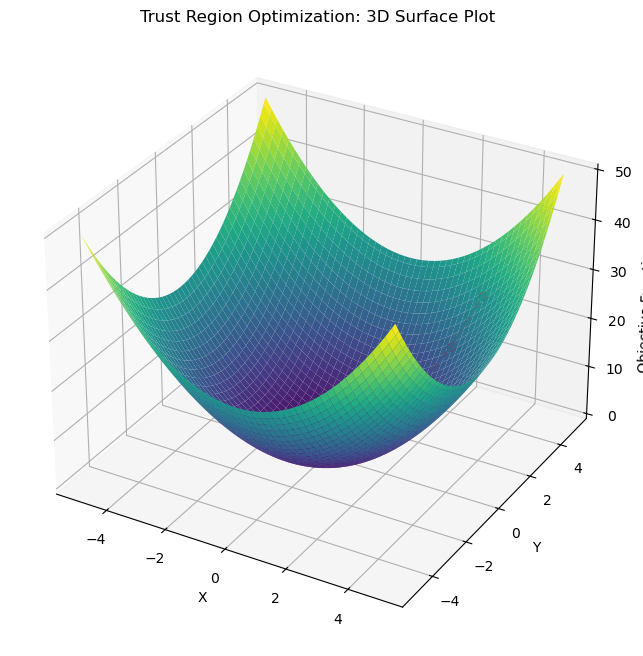

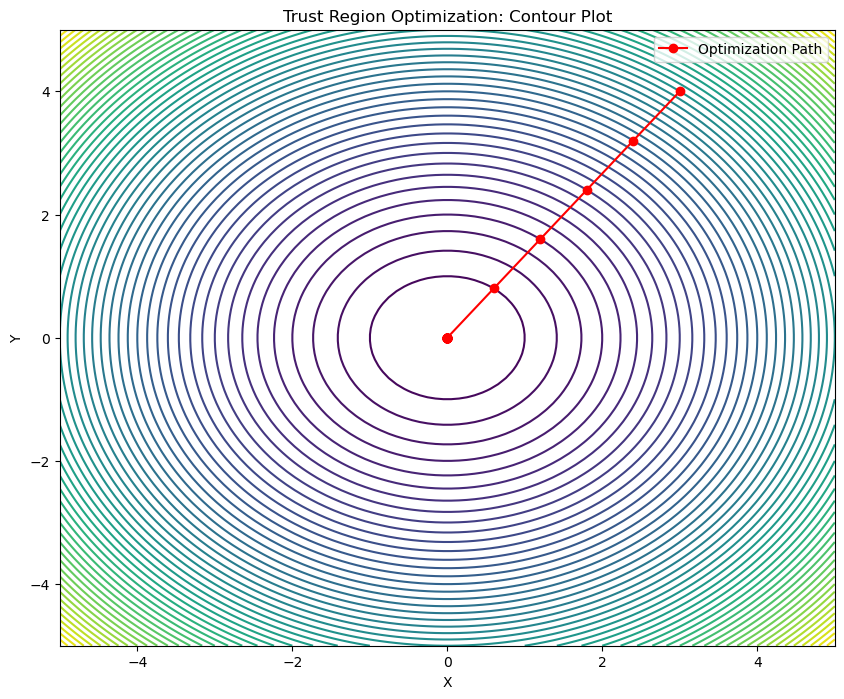

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the quadratic objective function: f(x, y) = x^2 + y^2
def objective_function(x, y):
    return x**2 + y**2

# Gradient of the objective function: ∇f(x, y) = [2x, 2y]
def gradient(x, y):
    return np.array([2*x, 2*y])

# Hessian (second-order derivatives) of the objective function: H = [2, 0; 0, 2]
def hessian(x, y):
    return np.array([[2, 0], [0, 2]])

# Trust Region optimization algorithm
def trust_region_optimization(x0, y0, delta_init=1.0, max_iter=50, eta=0.1):
    """
    Trust Region Optimization to minimize the quadratic function.
    - x0, y0: Initial starting points
    - delta_init: Initial trust region radius
    - max_iter: Maximum number of iterations
    - eta: Ratio to adjust the trust region
    """
    x, y = x0, y0
    delta = delta_init  # Trust region radius
    path = [(x, y)]
    
    for _ in range(max_iter):
        grad = gradient(x, y)
        H = hessian(x, y)
        
        # Solve the trust region subproblem using the linear system: H * d = -grad
        # where d is the step to take
        d = np.linalg.solve(H, -grad)
        
        # Check if the step d is within the trust region (i.e., its norm is <= delta)
        if np.linalg.norm(d) <= delta:
            # Accept the step
            x_new = x + d[0]
            y_new = y + d[1]
            actual_improvement = objective_function(x, y) - objective_function(x_new, y_new)
            predicted_improvement = grad.dot(d) + 0.5 * d.dot(H.dot(d))
            
            # Update the trust region size
            if actual_improvement / predicted_improvement > 0.75:
                delta *= 1.2  # Expand the region
            elif actual_improvement / predicted_improvement < 0.25:
                delta *= 0.5  # Shrink the region
        else:
            # If the step is outside the trust region, reduce the step
            d = d * (delta / np.linalg.norm(d))
            x_new = x + d[0]
            y_new = y + d[1]
        
        # Update the current position
        x, y = x_new, y_new
        path.append((x, y))
    
    return np.array(path)

# Step 1: Run Trust Region Optimization
initial_point = (3, 4)
path = trust_region_optimization(*initial_point)

# Step 2: Plotting the results
# 3D Surface Plot
X = np.linspace(-5, 5, 100)
Y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(X, Y)
Z = objective_function(X, Y)

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none')
ax.plot(path[:, 0], path[:, 1], objective_function(path[:, 0], path[:, 1]), color='r', marker='o')
ax.set_title("Trust Region Optimization: 3D Surface Plot")
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Objective Function Value')
plt.show()

# Contour Plot
plt.figure(figsize=(10, 8))
plt.contour(X, Y, Z, 50, cmap='viridis')
plt.plot(path[:, 0], path[:, 1], 'ro-', label="Optimization Path")
plt.title("Trust Region Optimization: Contour Plot")
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()


Explanation of the Code:
Objective Function:

We use a simple quadratic objective function 
𝑓
(
𝑥
,
𝑦
)
=
𝑥
2
+
𝑦
2
f(x,y)=x 
2
 +y 
2
 , which is easy to optimize and visualize. The global minimum occurs at (0, 0).
Gradient and Hessian:

The gradient of the function is 
[
2
𝑥
,
2
𝑦
]
[2x,2y].
The Hessian (second-order derivatives) is constant: 
[
[
2
,
0
]
,
[
0
,
2
]
]
[[2,0],[0,2]], since the objective function is quadratic.
Trust Region Optimization:

We initialize the starting point and the trust region radius.
At each iteration, we solve the trust region subproblem by computing the direction 
𝑑
d using the Hessian and gradient.
If the step 
𝑑
d is within the trust region, we take the step and update the position.
We adapt the trust region size based on the ratio of actual to predicted improvement.
Plotting:

The 3D surface plot shows the objective function and the optimization path taken by the algorithm.
The contour plot shows the 2D view of the optimization process, highlighting the path in red.
Output:
A 3D surface plot showing the optimization path.
A contour plot visualizing the optimization journey with respect to the objective function.